# Домашнее задание 2 (5 баллов).

Все задания ниже имеют равный вес (5/16).

In [ ]:
import pandas as pd

#### Описание данных

В папке Dat (https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/Data.zip) находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
    * Students_info_i - информация о студентах из группы i
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.¶

In [ ]:
info = []
marks = []
for i in range(0, 10):
    info.append(pd.read_csv(f"Students_info_{i}.csv"))
for i in range(0, 10):
    marks.append(pd.read_csv(f"Students_marks_{i}.csv"))
info_new = pd.DataFrame(pd.concat(info))
marks_new = pd.DataFrame(pd.concat(marks))
df = info_new.merge(marks_new, how = 'left')
df.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [ ]:
del df['index']
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
5,female,group B,associate's degree,standard,none,group1,71,83,78
6,female,group B,some college,standard,completed,group1,88,95,92
7,male,group B,some college,free/reduced,none,group1,40,43,39
8,male,group D,high school,free/reduced,completed,group1,64,64,67
9,female,group B,high school,free/reduced,none,group1,38,60,50


#### Задание 3. Выведите на экран размеры полученной таблицы

In [ ]:
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [ ]:
df.isnull().any().any()

False

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [ ]:
print(df['math score'].mean(),
df['reading score'].mean(),
df['writing score'].mean())

66.089 69.169 68.054


**Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [ ]:
#для начала хочу сохранить оценки для каждого предмета и для каждого значения колонки с курсами
math_com = round(df[df['test preparation course']=='completed']['math score'].mean(),2)
math_none = round(df[df['test preparation course']=='none']['math score'].mean(),2)
reading_com =  round(df[df['test preparation course']=='completed']['reading score'].mean(),2)
reading_none =  round(df[df['test preparation course']=='none']['reading score'].mean(),2)
writing_com =  round(df[df['test preparation course']=='completed']['writing score'].mean(),2)
writing_none =  round(df[df['test preparation course']=='none']['writing score'].mean(),2)

print('Оценки по математике для тех, кто проходил курс:',math_com,'. И для тех, кто не проходил:', math_none)
print('Оценка у тех кто проходил выше на', round(math_com-math_none,2)) if math_com-math_none >0 else print('Оценка понизилась на', round(math_none-math_com,2))

print('Оценки по чтению для тех, кто проходил курс:',reading_com,'. И для тех, кто не проходил:', reading_none,)
print('Оценка у тех кто проходил выше на', round(reading_com-reading_none,2)) if reading_com-reading_none >0 else print('Оценка понизилась на', round(reading_none-reading_com,2))

print('Оценки по письму для тех, кто проходил курс:',writing_com,'. И для тех, кто не проходил:', writing_none,)
print('Оценка у тех кто проходил выше на', round(writing_com-writing_none,2)) if writing_com-reading_none >0 else print('Оценка понизилась на', round(writing_none-writing_com,2))


Оценки по математике для тех, кто проходил курс: 69.7 . И для тех, кто не проходил: 64.08
Оценка повысилась на 5.62
Оценки по чтению для тех, кто проходил курс: 73.89 . И для тех, кто не проходил: 66.53
Оценка повысилась на 7.36
Оценки по письму для тех, кто проходил курс: 74.42 . И для тех, кто не проходил: 64.5
Оценка повысилась на 9.92


**Задание 8. Выведите на экран все различные значения из столбца lunch.**

In [ ]:
for i in range(len(df['lunch'].unique())):
  print(df['lunch'].unique()[i])

standard
free/reduced


**Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [ ]:
df = df.rename(columns={"parental level of education": "education", "test preparation course": "test preparation"})
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,average_mark,Grade
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P,P,72.666667,C
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P,P,82.333333,B
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P,P,92.666667,A
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F,F,49.333333,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P,P,76.333333,C


**Зафиксируем минимальный балл для сдачи экзамена**

In [ ]:
passmark = 50

**Задание 10. Ответьте на вопросы:**
    * Какая доля студентов сдала экзамен по математике (passmark >= 50)?
    * Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
    * Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике?

In [ ]:
print((df['math score']>=passmark).sum()/len(df))
print(len(df[(df['test preparation'] == 'completed') & (df['math score'] >= passmark)])/len((df[(df['test preparation'] == 'completed')])))
print(len(df[(df['test preparation'] == 'none') & (df['math score'] < passmark)&(df['gender']=='female')])/len((df[(df['test preparation'] == 'none')&(df['gender']=='female')])))

0.865
0.9217877094972067
0.20958083832335328


**Задание 11. С помощью groupby выполните задания ниже. Также выведите время выполнения каждого из заданий.**
    * Для каждой этнической группы выведите средний балл за экзамен по чтению
    * Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [ ]:
import time
st = time.time()
print(df.groupby(['race/ethnicity']).mean()['reading score'])
et = time.time()
print('Время исполнения:',et-st)
st = time.time()
print(df.groupby(['education'])['writing score'].min())
et = time.time()
print('Время исполнения:',et-st)

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64
Время исполнения: 0.012624263763427734
education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64
Время исполнения: 0.0074274539947509766


<ipython-input-13-e53498defa74>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['race/ethnicity']).mean()['reading score'])


**Задание 12. Выполните задание 11 с помощью циклов. Сравните время выполнения.**

In [ ]:

a = 0
a1 = 0
b = 0
b1 = 0
c = 0
c1 = 0
d = 0
d1 = 0
e = 0
e1 = 0
f = 0
st = time.time()
for i, row in df[['race/ethnicity','reading score']].iterrows():
  if row[0] == 'group A':
    a += row[1]
    a1 +=1
  if row[0] == 'group B':
    b += row[1]
    b1+=1
  if row[0] == 'group C':
    c += row[1]
    c1+=1
  if row[0] == 'group D':
    d += row[1]
    d1+=1
  if row[0] == 'group E':
    e += row[1]
    e1+=1
print('group A ',a/a1 )
print('group B ',b/b1 )
print('group C ',c/c1 )
print('group D ',d/d1 )
print('group E ',e/e1 )
et = time.time()
print('Время исполнения:',et-st)
st = time.time()
for i, row in df[['education','writing score']].iterrows():
  if row[0] == "associate's degree":
    a = min(row[1],a)
  if row[0] == "bachelor's degree":
    b += min(row[1],b)
  if row[0] == 'high school':
    c += min(row[1],c)
  if row[0] == "master's degree":
    d += min(d,row[1])
  if row[0] == 'some college':
    e += min(row[1],e)
  if row[0] == 'some high school':
    f += min(row[1],e)

print('group A ',a/a1 )
print('group B ',b/b1 )
print('group C ',c/c1 )
print('group D ',d/d1 )
print('group E ',e/e1 )
et = time.time()
print('Время исполнения:',et-st)



group A  64.67415730337079
group B  67.35263157894737
group C  69.10344827586206
group D  70.03053435114504
group E  73.02857142857142
Время исполнения: 0.06264901161193848
group A  0.39325842696629215
group B  112.92631578947369
group C  107.47335423197492
group D  87.07251908396947
group E  184.15714285714284
Время исполнения: 0.0534977912902832


**Задание 13. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.**

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas

In [ ]:
pd.pivot_table(data=df,index=['gender', 'education'])

<ipython-input-27-a1a2a65d7206>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(data=df,index=['gender', 'education'])


math score  reading score  writing score
gender education                                                   
female associate's degree   65.250000      74.120690      74.000000
       bachelor's degree    68.349206      77.285714      78.380952
       high school          59.351064      68.202128      66.691489
       master's degree      66.500000      76.805556      77.638889
       some college         65.406780      73.550847      74.050847
       some high school     59.296703      69.109890      68.285714
male   associate's degree   70.764151      67.433962      65.405660
       bachelor's degree    70.581818      68.090909      67.654545
       high school          64.705882      61.480392      58.539216
       master's degree      74.826087      73.130435      72.608696
       some college         69.009259      64.990741      63.148148
       some high school     67.840909      64.693182      61.375000

#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [ ]:
import numpy as np
df['Math_PassStatus'] = np.where(df['math score']>=passmark, 'P', 'F')
print('Сдали экзамен по математике:',len(df[df['Math_PassStatus']=='P']))
print('Не сдали экзаемн по математике:',len(df[df['Math_PassStatus']=='F']))

Сдали экзамен по математике: 865
Не сдали экзаемн по математике: 135


In [ ]:
df['Reading_PassStatus'] = np.where(df['reading score']>=passmark, 'P', 'F')
print('Сдали экзамен по чтению',len(df[df['Reading_PassStatus']=='P']))
print('Не сдали экзаемн по чтению:',len(df[df['Reading_PassStatus']=='F']))
df['Writing_PassStatus'] = np.where(df['writing score']>=passmark, 'P', 'F')
print('Сдали экзамен по письму:',len(df[df['Writing_PassStatus']=='P']))
print('Не сдали экзаемн по письму:',len(df[df['Writing_PassStatus']=='F']))
df.head()

Сдали экзамен по чтению 910
Не сдали экзаемн по чтению: 90
Сдали экзамен по письму: 886
Не сдали экзаемн по письму: 114


,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P


#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [ ]:
df['Overall_PassStatus'] = np.where(((df['math score']>=passmark) & (df['reading score']>=passmark) & (df['writing score']>=passmark)), 'P', 'F')
print('Сдали все экзамены:',len(df[df['Overall_PassStatus']=='P']))
df.head()

Сдали все экзамены: 812


,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,average_mark,Grade
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P,P,72.666667,C
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P,P,82.333333,B
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P,P,92.666667,A
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F,F,49.333333,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P,P,76.333333,C


#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 90 = A
####      80-90 = B
####      70-80 = C
####      60-70 = D
####      50-60 = E
####    меньше 50 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

**В случае, если средний балл попадает на границу между оценками (т.е. равен ровно 60, 70 или 80 баллов), вы можете интерпретировать условие на своё усмотрение (т.е. можете поставить за 60 баллов оценку D, а можете - E).**

In [ ]:
def GetGrade(average_mark):
  if (average_mark>=90):
    return 'A'
  elif(average_mark>=80):
    return 'B'
  elif(average_mark>=70):
    return 'C'
  elif(average_mark>=60):
    return 'D'
  elif(average_mark>=50):
    return 'E'
  else:
    return 'F'

df['average_mark'] = (df['math score']+df['writing score']+df['reading score'])/3
df['Grade'] = df['average_mark'].apply(GetGrade)
print(df['Grade'].value_counts())
df.head()


C    261
D    256
E    182
B    146
F    103
A     52
Name: Grade, dtype: int64


,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,average_mark,Grade
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P,P,72.666667,C
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P,P,82.333333,B
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P,P,92.666667,A
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F,F,49.333333,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P,P,76.333333,C


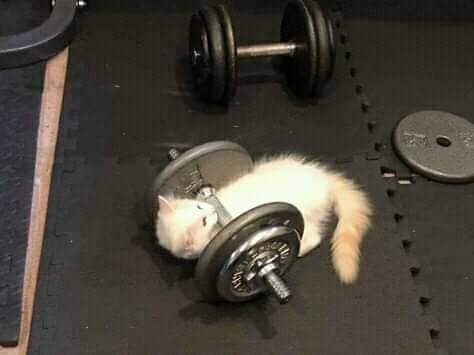